In [0]:
!pip install face_recognition

[-0.07444756  0.0349806   0.07273617 -0.059142   -0.06361317 -0.04683416
 -0.07549586 -0.11883379  0.12556033 -0.10577658  0.23252398 -0.07607003
 -0.23531234 -0.06317507 -0.05295949  0.21582711 -0.16054611 -0.12357058
 -0.10265387 -0.05140973  0.06332883 -0.04596993  0.04988658  0.03909935
 -0.10859575 -0.37902662 -0.12327593 -0.06590772 -0.00454662 -0.06544332
 -0.07222491  0.03768658 -0.17142421 -0.01797886  0.0116419   0.09726366
 -0.00674066 -0.14483789  0.17085074 -0.02558799 -0.28528702  0.00778946
  0.06131962  0.18630557  0.23148017  0.070248    0.01368714 -0.1238746
  0.15143639 -0.1796876   0.03556271  0.13580886  0.01246027  0.04997488
 -0.00936052 -0.07763345  0.06041431  0.13959581 -0.14848866 -0.09548088
  0.06956036 -0.12677562 -0.05123013 -0.06524903  0.17923383  0.1419118
 -0.11263615 -0.17973275  0.12120939 -0.19618198 -0.03313473  0.06095239
 -0.15698899 -0.15710221 -0.3125636  -0.00556648  0.37933403  0.04217856
 -0.15694089  0.02234439 -0.02722985  0.01443241  0.1

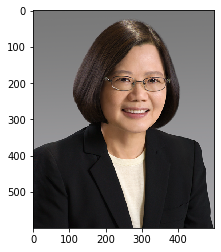

In [9]:
%matplotlib inline
import face_recognition
import matplotlib.pyplot as plt
img = face_recognition.load_image_file("inwen.png")
en = face_recognition.face_encodings(img)
print(en[0])
plt.imshow(img)

In [0]:
import glob
encodings = []
names = []
fs = glob.glob("*.jpg") + glob.glob("*.png")
for fname in fs:
    img = face_recognition.load_image_file(fname)
    en = face_recognition.face_encodings(img)
    encodings.append(en[0])
    names.append(fname.split(".")[0])
print(names)
print(encodings)

In [14]:
names

['ashin', 'yui', 'clock', 'inwen']

請輸入網址:https://static.taisounds.com/WebUpd/TaiSounds/society/cover_20022715441253005.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 ashin 的距離: 0.5776310851925719
跟 yui 的距離: 0.6746050186384901
跟 clock 的距離: 0.28784241159169166
跟 inwen 的距離: 0.6478939807052714
應該是: clock


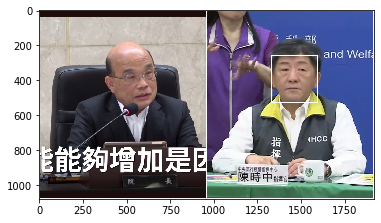

In [26]:
# pip install opencc-python
import cv2
import requests
url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)

for (top, right, bottom, left) in face_recognition.face_locations(img):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)


for en in ens:
    distance = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distance):
        print("跟", n, "的距離:", d)
    if min(distance) > 0.5:
        print("沒有辨識到")
    else:
        print("應該是:", names[distance.argmin()])
plt.imshow(img)